#### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset 

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data(label_mode="fine")

In [3]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

In [5]:
y_train.shape , y_test.shape

((50000,), (10000,))

#### Data Visualization

In [6]:
def plot_sample(X, y, sample_indexes):
    for index in sample_indexes:
        plt.figure(figsize = (15,2))
        plt.imshow(X[index])
        

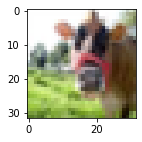

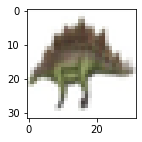

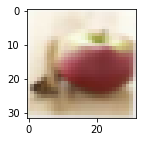

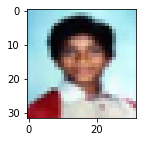

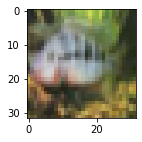

In [7]:
plot_sample(X_train, y_train, range(5))

#### Normalizing the training data

In [8]:
X_train = X_train / 255
X_test = X_test / 255

#### build a convolutional neural network and train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 4.2092 - accuracy: 0.0650
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 3.2982 - accuracy: 0.2081
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.9392 - accuracy: 0.2726
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.7040 - accuracy: 0.3210
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.5444 - accuracy: 0.3531
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.4318 - accuracy: 0.3782
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 2.3534 - accuracy: 0.3893
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.2748 - accuracy: 0.4039
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.1941 - accuracy: 0.4219
Epoch 10/10
1563/1563 [==============================] - 60s 39m

#### Evaluate the model

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.6535 - accuracy: 0.3467


[2.653475046157837, 0.3467000126838684]

In [18]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.75      0.60       100
           1       0.26      0.67      0.38       100
           2       0.29      0.20      0.24       100
           3       0.50      0.11      0.18       100
           4       0.18      0.31      0.23       100
           5       0.18      0.39      0.25       100
           6       0.66      0.29      0.40       100
           7       0.49      0.20      0.28       100
           8       0.35      0.56      0.43       100
           9       0.43      0.39      0.41       100
          10       0.24      0.26      0.25       100
          11       0.32      0.06      0.10       100
          12       0.29      0.33      0.31       100
          13       0.28      0.39      0.33       100
          14       0.32      0.24      0.28       100
          15       0.34      0.26      0.29       100
          16       0.36      0.28      0.32       100
     

Text(429.0, 0.5, 'Truth')

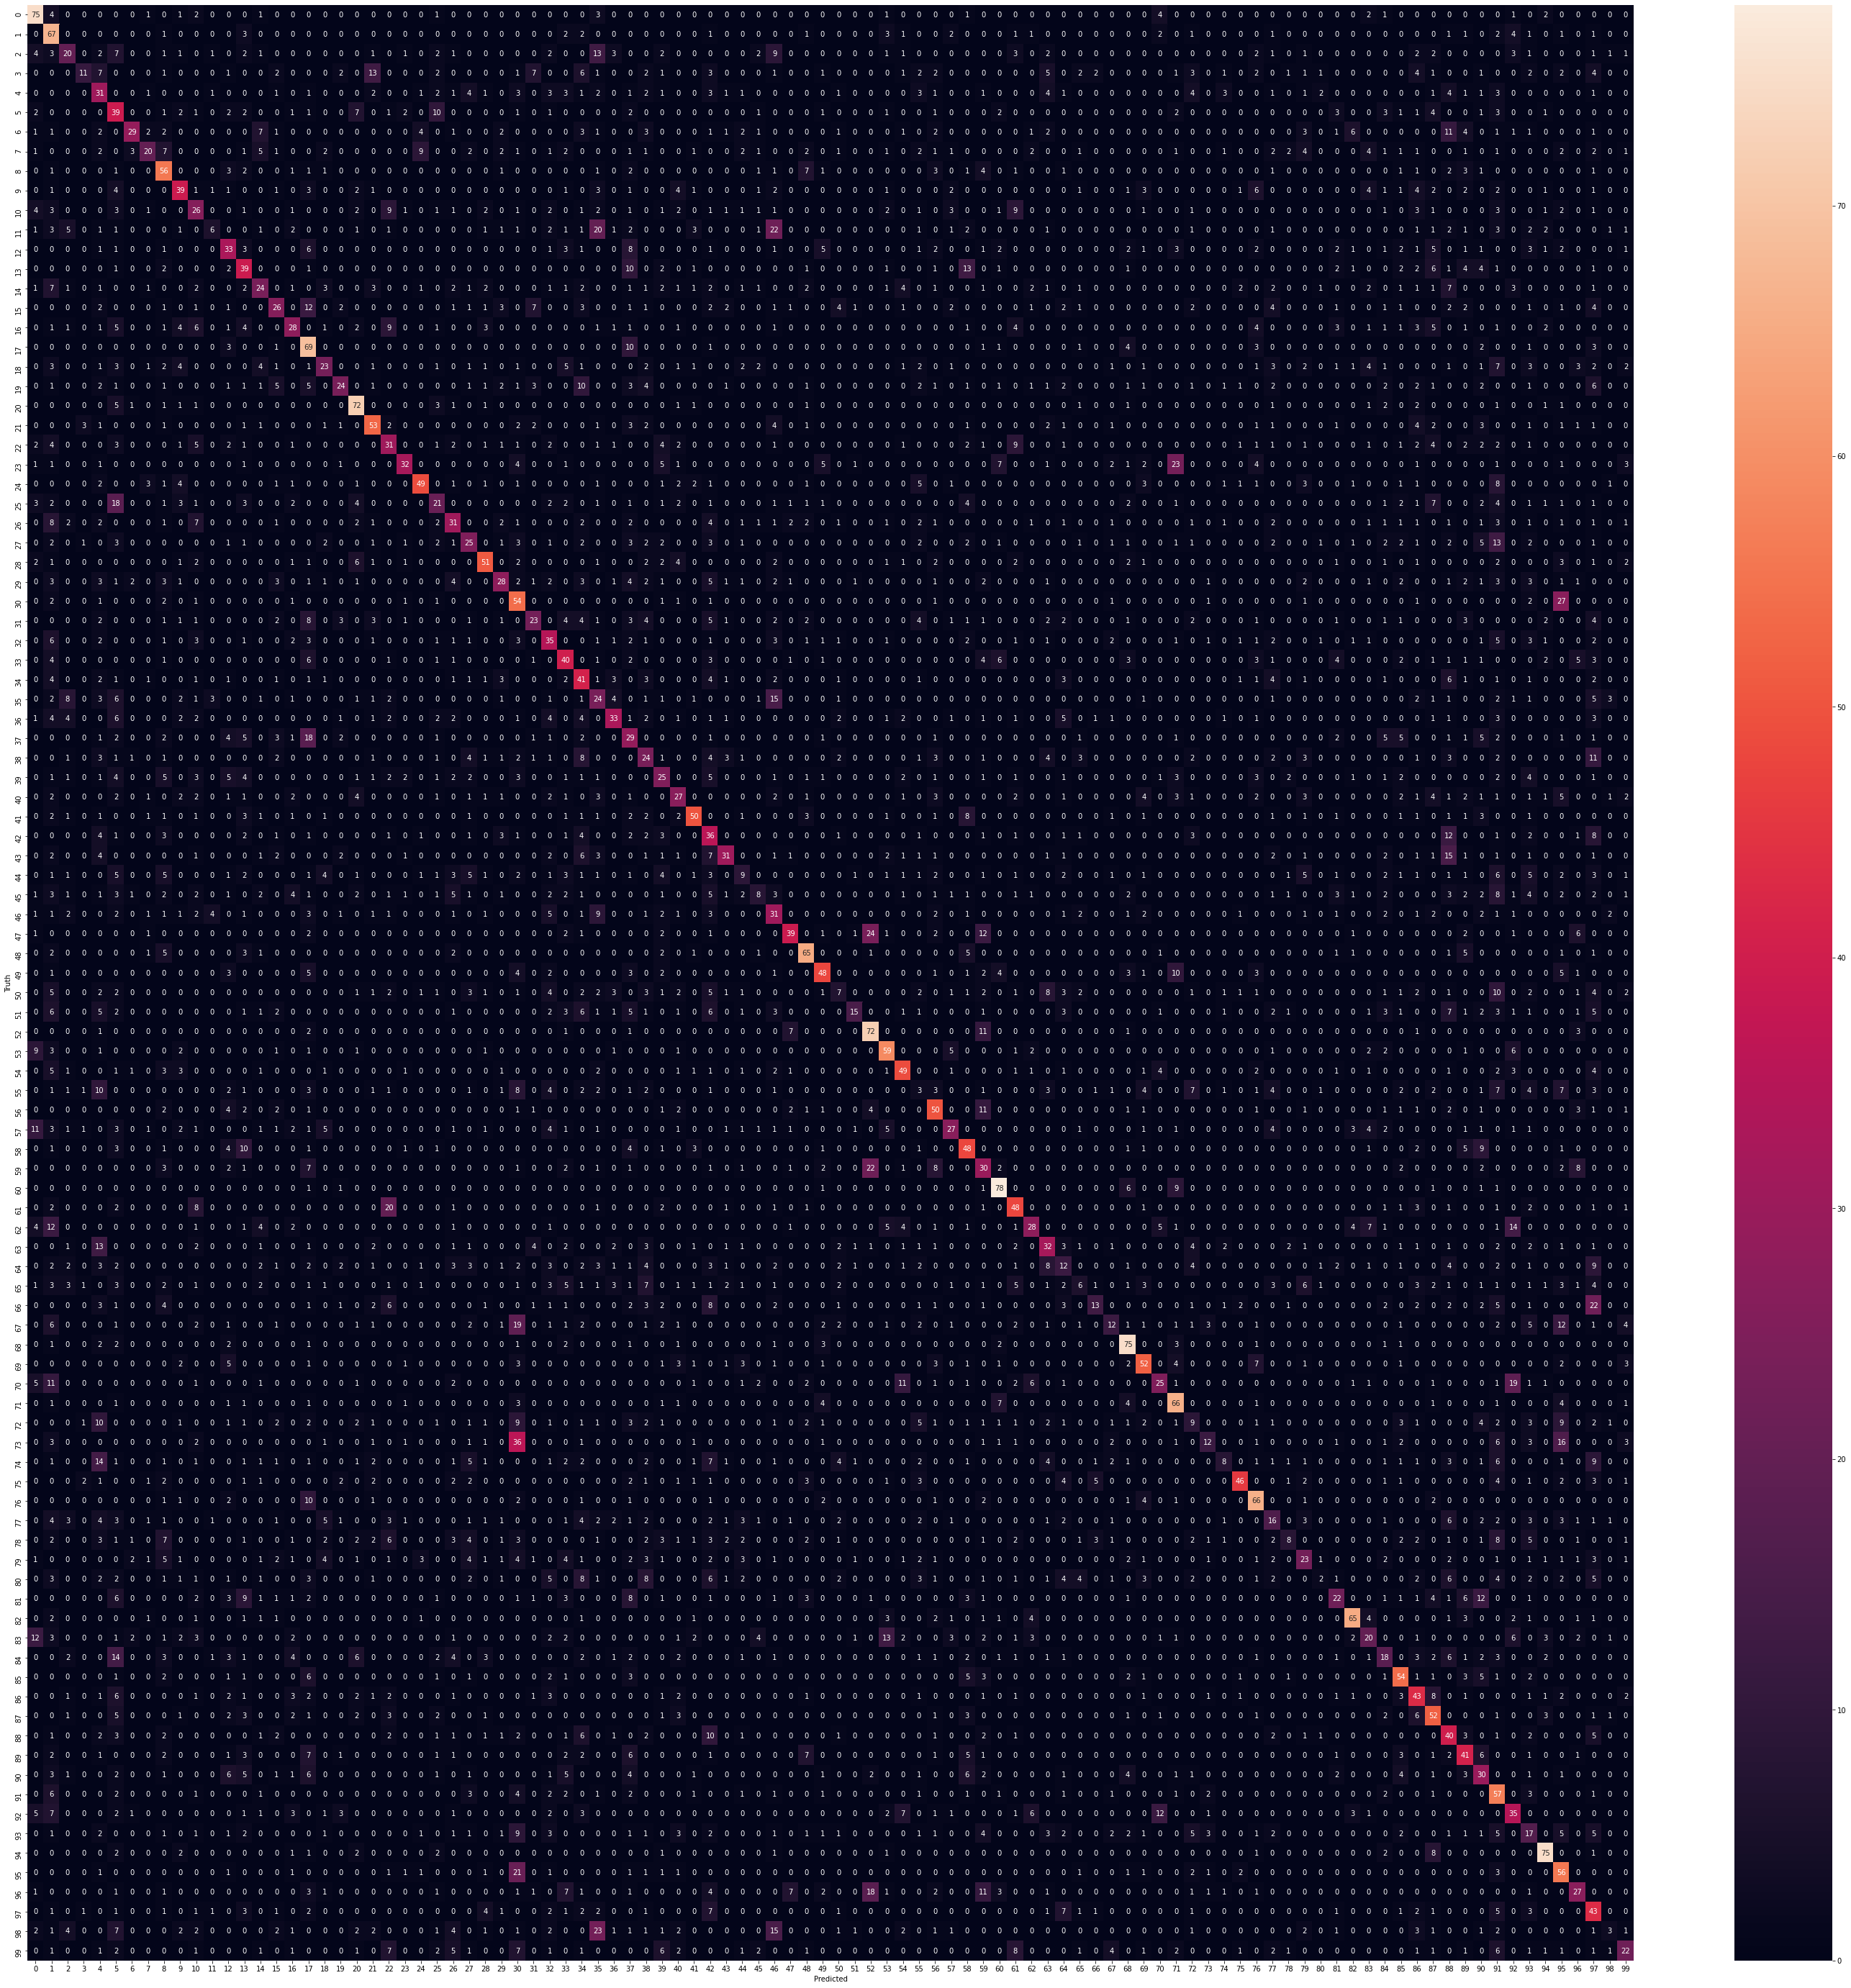

In [19]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (50,50))
sn.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')